In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
s_df = pd.read_csv('/content/drive/MyDrive/ML/서울시_아파트_전세_17~24_결측치 수정.csv')

In [ ]:
# 통계 정보 값이 너무 커서 지수로 표현될 떄 변환
pd.set_option("float_format", "{:.0f}".format)

# 모든 컬럼을 표시하도록 설정
pd.set_option('display.max_columns', None)
# df 테이블 행 모두 출력되도록 펼치는 방법
pd.set_option('display.max_rows', 10000)

In [ ]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899031 entries, 0 to 899030
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  899031 non-null  int64  
 1   접수년도        899031 non-null  int64  
 2   자치구명        899031 non-null  object 
 3   법정동명        899031 non-null  object 
 4   본번          899031 non-null  float64
 5   부번          899031 non-null  float64
 6   층           899031 non-null  float64
 7   임대면적        899031 non-null  float64
 8   보증금(만원)     899031 non-null  int64  
 9   건축년도        899031 non-null  float64
 10  건물명         899031 non-null  object 
 11  평당 전세가(만원)  899031 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 82.3+ MB


In [ ]:
s_df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [ ]:
s_df.describe(include='all')

,접수년도,자치구명,법정동명,본번,부번,층,임대면적,보증금(만원),건축년도,건물명,평당 전세가(만원)
count,899031,899031,899031,899031,899031,899031,899031,899031,899031,899031,899031
unique,NaN,25,338,NaN,NaN,NaN,NaN,NaN,NaN,8051,NaN
top,NaN,송파구,상계동,NaN,NaN,NaN,NaN,NaN,NaN,현대,NaN
freq,NaN,79670,31794,NaN,NaN,NaN,NaN,NaN,NaN,6974,NaN
mean,2020,NaN,NaN,590,5,9,75,48211,2001,NaN,641
std,2,NaN,NaN,569,38,6,28,30142,12,NaN,293
min,2017,NaN,NaN,0,0,-4,10,500,1961,NaN,4
25%,2019,NaN,NaN,195,0,4,60,29500,1992,NaN,447
50%,2020,NaN,NaN,498,0,8,79,42000,2001,NaN,589
75%,2022,NaN,NaN,800,0,13,85,60000,2010,NaN,768


In [ ]:
s_df.isnull().sum()

접수년도          0
자치구명          0
법정동명          0
본번            0
부번            0
층             0
임대면적          0
보증금(만원)       0
건축년도          0
건물명           0
평당 전세가(만원)    0
dtype: int64

In [ ]:
# s_df['법정동명'].unique()

In [ ]:
#import re
#s_df['법정동명'] = s_df['법정동명'].apply(lambda x: re.findall(r'^\w+동', x)[0] if re.findall(r'^\w+동', x) else "")

In [ ]:
# s_df['법정동명'].unique()

In [ ]:
s_df.describe(include='all')
# 서울시 426개 동 중 270개

,접수년도,자치구명,법정동명,지번구분,층,임대면적,보증금(만원),건축년도,건물용도
count,648575,648575,648575,648481,648575,648575,648575,648461,648575
unique,NaN,25,337,3,NaN,NaN,NaN,NaN,1
top,NaN,송파구,상계동,대지,NaN,NaN,NaN,NaN,아파트
freq,NaN,57076,22824,647608,NaN,NaN,NaN,NaN,648575
mean,2021,NaN,NaN,NaN,9,75,50073,2002,NaN
std,1,NaN,NaN,NaN,6,27,31614,12,NaN
min,2019,NaN,NaN,NaN,-4,10,500,1961,NaN
25%,2020,NaN,NaN,NaN,4,60,30000,1993,NaN
50%,2021,NaN,NaN,NaN,8,76,44000,2002,NaN
75%,2022,NaN,NaN,NaN,13,85,62000,2011,NaN


In [ ]:
s_df.isnull().sum()

접수년도         0
자치구명         0
법정동명         0
지번구분        94
층            0
임대면적         0
보증금(만원)      0
건축년도       114
건물용도         0
dtype: int64

In [ ]:
s_df[s_df['지번구분'] == '산']

## 1차 결측치 처리

In [ ]:
s_df['지번구분'] = s_df['지번구분'].fillna('대지')

In [ ]:
mode = s_df.groupby('자치구명')[['건축년도']].apply(lambda x: x.mode().iloc[0]) # .iloc[0] = 가장 첫번째 행 (=최빈값) 불러오는 역할
mode

,건축년도
자치구명,
강남구,1992
강동구,2019
강북구,2004
강서구,2014
관악구,2000
광진구,1989
구로구,2011
금천구,2004
노원구,1988


In [ ]:
def fill_na_with_mode(row):
    if pd.isnull(row['건축년도']):
        return mode.loc[row['자치구명'], '건축년도']
    else:
        return row['건축년도']

s_df['건축년도'] = s_df.apply(fill_na_with_mode, axis=1)

In [ ]:
s_df.isnull().sum()

접수년도       0
자치구명       0
법정동명       0
지번구분       0
층          0
임대면적       0
보증금(만원)    0
건축년도       0
건물용도       0
dtype: int64

# 기타 항목 전처리 (컬럼이름, 컬럼삭제)

In [ ]:
# 건물용도 모두 아파트기 때문에 컬럼 삭제
s_df.drop(['건물용도'], axis = 1, inplace=True)

KeyError: "['건물용도'] not found in axis"

In [ ]:
# 보증금(만원) -> 전세가(만원) 변경
s_df = s_df.rename(columns={'보증금(만원)':'전세가(만원)'})

In [ ]:
s_df.head()

,접수년도,자치구명,법정동명,본번,부번,층,임대면적,전세가(만원),건축년도,건물명,평당 전세가(만원)
0,2017,강남구,논현동,46,2,1,139,70000,2003,힐스빌7,505
1,2017,강남구,삼성동,50,0,6,84,95000,2008,현대힐스테이트2단지,1128
2,2017,강남구,삼성동,50,0,5,84,87000,2008,현대힐스테이트2단지,1033
3,2017,강남구,삼성동,50,0,6,84,92000,2008,현대힐스테이트2단지,1092
4,2017,강남구,삼성동,50,0,1,84,85000,2008,현대힐스테이트2단지,1009


In [ ]:
s_df.describe(include='all')

,접수년도,자치구명,법정동명,본번,부번,층,임대면적,전세가(만원),건축년도,건물명,평당 전세가(만원)
count,899031,899031,899031,899031,899031,899031,899031,899031,899031,899031,899031
unique,NaN,25,338,NaN,NaN,NaN,NaN,NaN,NaN,8051,NaN
top,NaN,송파구,상계동,NaN,NaN,NaN,NaN,NaN,NaN,현대,NaN
freq,NaN,79670,31794,NaN,NaN,NaN,NaN,NaN,NaN,6974,NaN
mean,2020,NaN,NaN,590,5,9,75,48211,2001,NaN,641
std,2,NaN,NaN,569,38,6,28,30142,12,NaN,293
min,2017,NaN,NaN,0,0,-4,10,500,1961,NaN,4
25%,2019,NaN,NaN,195,0,4,60,29500,1992,NaN,447
50%,2020,NaN,NaN,498,0,8,79,42000,2001,NaN,589
75%,2022,NaN,NaN,800,0,13,85,60000,2010,NaN,768


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121753 files and direc

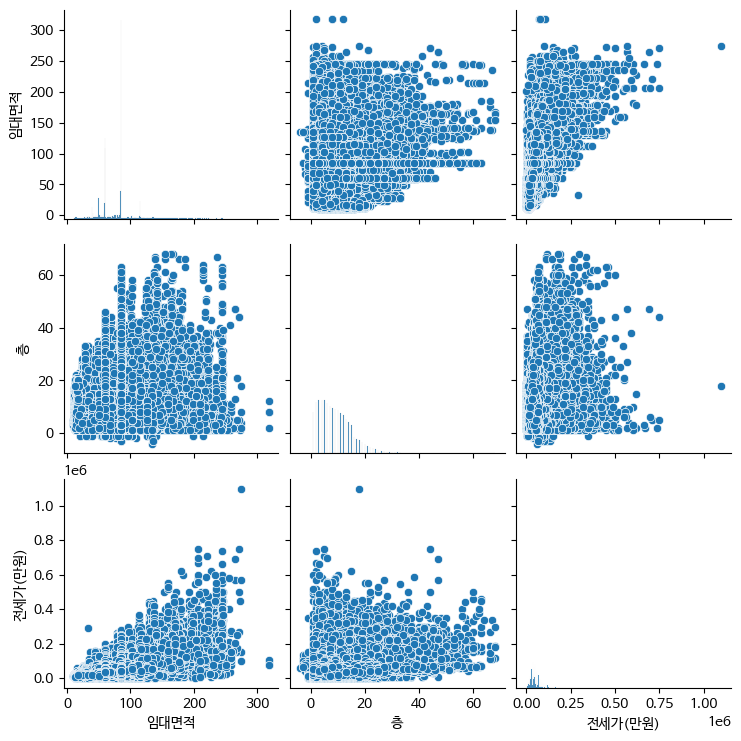

In [ ]:
sns.pairplot(s_df[['임대면적', '층', '전세가(만원)']])

In [ ]:
# s_df.to_csv('/content/drive/MyDrive/ML_1차_결측치',index=False)

# 스케일링/인코딩

In [ ]:
# 연속형 데이터에 대한 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def numeric_sc(df):
    mm_sc = MinMaxScaler()
    sd_sc = StandardScaler()

    sd_sc.fit(s_df[['임대면적','건축년도']])
    df[['임대면적sc', '건축년도sc']] = sd_sc.transform(df[['임대면적', '건축년도']])

    mm_sc.fit(s_df[['층']])
    df[['층mm']] = mm_sc.transform(df[['층']])

    return df

numeric_sc(s_df).describe()

,접수년도,본번,부번,층,임대면적,전세가(만원),건축년도,평당 전세가(만원),임대면적sc,건축년도sc,층mm
count,899031,899031,899031,899031,899031,899031,899031,899031,899031,899031,899031
mean,2020,590,5,9,75,48211,2001,641,-0,0,0
std,2,569,38,6,28,30142,12,293,1,1,0
min,2017,0,0,-4,10,500,1961,4,-2,-3,0
25%,2019,195,0,4,60,29500,1992,447,-1,-1,0
50%,2020,498,0,8,79,42000,2001,589,0,-0,0
75%,2022,800,0,13,85,60000,2010,768,0,1,0
max,2024,4974,2837,68,317,1100000,2024,8770,9,2,1


In [ ]:
# 범주형 데이터에 대한 인코딩
# !pip install category_encoders
import category_encoders as ce

def get_category(df):
    from sklearn.preprocessing import OneHotEncoder, LabelEncoder

    le1 = LabelEncoder()
    le2 = LabelEncoder()
    oh1 = OneHotEncoder()
    oh2 = OneHotEncoder()
    oh3 = OneHotEncoder()
    be = ce.BinaryEncoder()

    #le.fit(s_df[['자치구명']])
    #df['자치구명le'] = le.transform(df['자치구명'])
    # 각 고유 숫자마다 가중치로 인식되는 문제.. (해당 인코딩은 랜덤포레스트 사용 시)
    df.reset_index(drop=True, inplace=True)

    le1.fit(s_df[['접수년도']])
    df['접수년도le'] = le1.transform(df[['접수년도']])

    le2.fit(s_df[['건축년도']])
    df['건축년도le'] = le2.transform(df[['건축년도']])

    df['본번'] = df['본번'].astype('category')
    # BinaryEncoder를 사용하여 '본번' 열 인코딩
    df_encoded1 = be.fit_transform(df['본번'])
    # 인코딩된 데이터프레임 병합
    df = pd.concat([df, df_encoded1], axis=1)

    df['부번'] = df['부번'].astype('category')
    df_encoded2 = be.fit_transform(df['부번'])
    df = pd.concat([df, df_encoded2], axis=1)

    df_encoded3 = be.fit_transform(df[['건물명']])
    df = pd.concat([df, df_encoded3], axis=1)
    df = df.reset_index() # BinaryEncoder하고나서 reset_index() 해야 결측치 안생김 ... 이유는 ?

    # 범주형 변수 이진 벡터로 변환하여 새로운 열 추가
    oh1.fit(s_df[['자치구명']])
    자치구명_csr = oh1.transform(df[['자치구명']])

    자치구명_csr_df = pd.DataFrame(자치구명_csr.toarray(),
                               columns = oh1.get_feature_names_out())
    df = pd.concat([df, 자치구명_csr_df], axis=1)

    # Target Encoder 초기화
    encoder = ce.TargetEncoder(cols=['법정동명'])

    # Target Encoding 적용
    df_encoded = encoder.fit_transform(df['법정동명'], df['전세가(만원)'])
    # 컬럼 이름 변경
    df_encoded.columns = ['법정동명te']

    df = pd.concat([df, df_encoded], axis=1)
    return df

s_df = get_category(s_df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

In [ ]:
s_df.isnull().sum()

index         0
접수년도          0
자치구명          0
법정동명          0
본번            0
부번            0
층             0
임대면적          0
전세가(만원)       0
건축년도          0
건물명           0
평당 전세가(만원)    0
접수년도le        0
건축년도le        0
본번_0          0
본번_1          0
본번_2          0
본번_3          0
본번_4          0
본번_5          0
본번_6          0
본번_7          0
본번_8          0
본번_9          0
본번_10         0
부번_0          0
부번_1          0
부번_2          0
부번_3          0
부번_4          0
부번_5          0
부번_6          0
부번_7          0
부번_8          0
건물명_0         0
건물명_1         0
건물명_2         0
건물명_3         0
건물명_4         0
건물명_5         0
건물명_6         0
건물명_7         0
건물명_8         0
건물명_9         0
건물명_10        0
건물명_11        0
건물명_12        0
자치구명_강남구      0
자치구명_강동구      0
자치구명_강북구      0
자치구명_강서구      0
자치구명_관악구      0
자치구명_광진구      0
자치구명_구로구      0
자치구명_금천구      0
자치구명_노원구      0
자치구명_도봉구      0
자치구명_동대문구     0
자치구명_동작구      0
자치구명_마포구      0
자치구명_서대문구     0
자치구명_서초구      0
자치구명_성동구

In [ ]:
s_df.head()

,index,접수년도,자치구명,법정동명,본번,부번,층,임대면적,전세가(만원),건축년도,건물명,평당 전세가(만원),접수년도le,건축년도le,본번_0,본번_1,본번_2,본번_3,본번_4,본번_5,본번_6,본번_7,본번_8,본번_9,본번_10,부번_0,부번_1,부번_2,부번_3,부번_4,부번_5,부번_6,부번_7,부번_8,건물명_0,건물명_1,건물명_2,건물명_3,건물명_4,건물명_5,건물명_6,건물명_7,건물명_8,건물명_9,건물명_10,건물명_11,건물명_12,자치구명_강남구,자치구명_강동구,자치구명_강북구,자치구명_강서구,자치구명_관악구,자치구명_광진구,자치구명_구로구,자치구명_금천구,자치구명_노원구,자치구명_도봉구,자치구명_동대문구,자치구명_동작구,자치구명_마포구,자치구명_서대문구,자치구명_서초구,자치구명_성동구,자치구명_성북구,자치구명_송파구,자치구명_양천구,자치구명_영등포구,자치구명_용산구,자치구명_은평구,자치구명_종로구,자치구명_중구,자치구명_중랑구,법정동명te
0,0,2017,강남구,논현동,46,2,1,139,70000,2003,힐스빌7,505,0,39,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62457
1,1,2017,강남구,삼성동,50,0,6,84,95000,2008,현대힐스테이트2단지,1128,0,44,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86265
2,2,2017,강남구,삼성동,50,0,5,84,87000,2008,현대힐스테이트2단지,1033,0,44,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86265
3,3,2017,강남구,삼성동,50,0,6,84,92000,2008,현대힐스테이트2단지,1092,0,44,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86265
4,4,2017,강남구,삼성동,50,0,1,84,85000,2008,현대힐스테이트2단지,1009,0,44,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86265


In [ ]:
s_df.columns

Index(['index', '접수년도', '자치구명', '법정동명', '본번', '부번', '층', '임대면적', '전세가(만원)',
       '건축년도', '건물명', '평당 전세가(만원)', '접수년도le', '건축년도le', '본번_0', '본번_1', '본번_2',
       '본번_3', '본번_4', '본번_5', '본번_6', '본번_7', '본번_8', '본번_9', '본번_10', '부번_0',
       '부번_1', '부번_2', '부번_3', '부번_4', '부번_5', '부번_6', '부번_7', '부번_8', '건물명_0',
       '건물명_1', '건물명_2', '건물명_3', '건물명_4', '건물명_5', '건물명_6', '건물명_7', '건물명_8',
       '건물명_9', '건물명_10', '건물명_11', '건물명_12', '자치구명_강남구', '자치구명_강동구',
       '자치구명_강북구', '자치구명_강서구', '자치구명_관악구', '자치구명_광진구', '자치구명_구로구', '자치구명_금천구',
       '자치구명_노원구', '자치구명_도봉구', '자치구명_동대문구', '자치구명_동작구', '자치구명_마포구',
       '자치구명_서대문구', '자치구명_서초구', '자치구명_성동구', '자치구명_성북구', '자치구명_송파구', '자치구명_양천구',
       '자치구명_영등포구', '자치구명_용산구', '자치구명_은평구', '자치구명_종로구', '자치구명_중구', '자치구명_중랑구',
       '법정동명te'],
      dtype='object')

# 모델링

In [ ]:
# X, y 훈련/테스트 변수 설정
from sklearn.model_selection import train_test_split

X = s_df[['접수년도le', '건축년도le', '본번_0', '본번_1', '본번_2', '본번_3', '층', '임대면적',
       '본번_4', '본번_5', '본번_6', '본번_7', '본번_8', '본번_9', '본번_10', '부번_0', '부번_1',
       '부번_2', '부번_3', '부번_4', '부번_5', '부번_6', '부번_7', '부번_8',
       '건물명_0', '건물명_1', '건물명_2', '건물명_3', '건물명_4', '건물명_5', '건물명_6', '건물명_7', '건물명_8',
       '건물명_9', '건물명_10', '건물명_11', '건물명_12',
       '자치구명_강남구','자치구명_강동구', '자치구명_강북구', '자치구명_강서구', '자치구명_관악구', '자치구명_광진구', '자치구명_구로구',
       '자치구명_금천구', '자치구명_노원구', '자치구명_도봉구', '자치구명_동대문구', '자치구명_동작구', '자치구명_마포구',
       '자치구명_서대문구', '자치구명_서초구', '자치구명_성동구', '자치구명_성북구', '자치구명_송파구', '자치구명_양천구',
       '자치구명_영등포구', '자치구명_용산구', '자치구명_은평구', '자치구명_종로구', '자치구명_중구', '자치구명_중랑구',
       '법정동명te']]
y = s_df['전세가(만원)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 훈련/테스트 갯수 확인
len(X_train), len(y_train), len(X_test), len(y_test)

(719224, 719224, 179807, 179807)

In [ ]:
# 다중선형회귀모델
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

y_lr_pred = model_lr.predict(X_test)

def get_score(model_name, y_true, y_pred):
    mae = round(mean_absolute_error(y_true, y_pred), 2)
    mse = round(mean_squared_error(y_true, y_pred), 2)
    rmse = round(np.sqrt(mse), 2)
    r2 = round(r2_score(y_true, y_pred), 2)
    print(model_name, 'MAE: ', mae, ', MSE: ', mse, ', RMSE: ', rmse, ', R2 Score: ', r2)

get_score('lr ', y_test, y_lr_pred)

lr  MAE:  10918.05 , MSE:  277412536.85 , RMSE:  16655.71 , R2 Score:  0.7


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


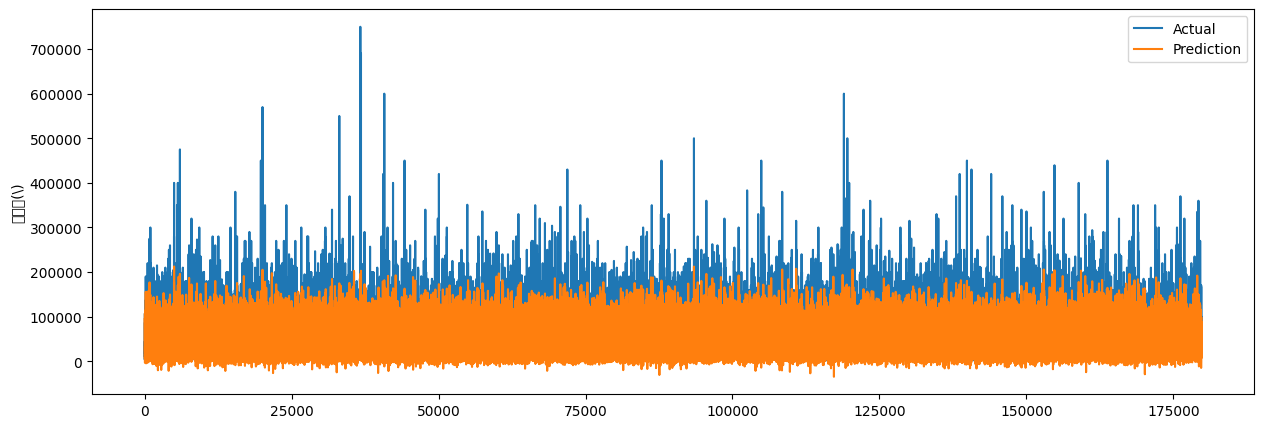

In [ ]:
# 예측 결과 시각화
y_test = y_test.reset_index(drop=True)

plt.figure(figsize=(15, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_lr_pred, label='Prediction')
plt.legend(loc='upper right')
plt.ylabel('보증금(\)')
plt.show()

In [ ]:
# GradientBoost 모델
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor()

model_gb.fit(X_train, y_train)

y_gb_pred = model_gb.predict(X_test)

def get_score(model_name, y_true, y_pred):
    mae = round(mean_absolute_error(y_true, y_pred), 2)
    mse = round(mean_squared_error(y_true, y_pred), 2)
    rmse = round(np.sqrt(mse), 2)
    r2 = round(r2_score(y_true, y_pred), 2)
    print(model_name, 'MAE: ', mae, ', MSE: ', mse, ', RMSE: ', rmse, ', R2 Score: ', r2)

get_score('gb ', y_test, y_gb_pred)

gb  MAE:  8590.69 , MSE:  170312953.45 , RMSE:  13050.4 , R2 Score:  0.81


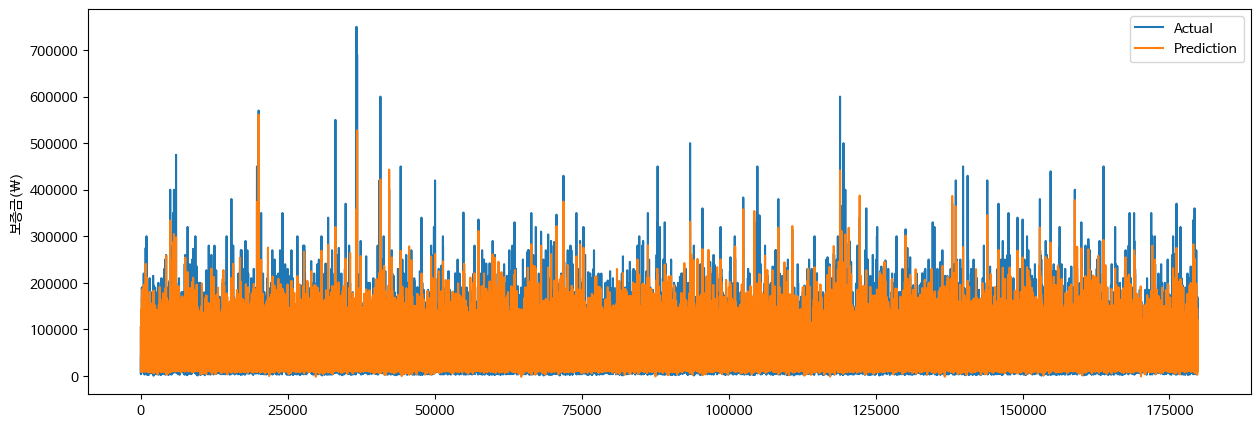

In [ ]:
# 예측 결과 시각화
y_test = y_test.reset_index(drop=True)

plt.figure(figsize=(15, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_gb_pred, label='Prediction')
plt.legend(loc='upper right')
plt.ylabel('보증금(\)')
plt.show()

In [ ]:
# 랜덤포레스트모델
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#+a MAE, MSE, RMSE, R-squared(수정된 R2도 고민)

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_rf_pred = model_rf.predict(X_test)

def get_score(model_name, y_true, y_pred):
    mae = round(mean_absolute_error(y_true, y_pred), 2)
    mse = round(mean_squared_error(y_true, y_pred), 2)
    rmse = round(np.sqrt(mse), 2)
    r2 = round(r2_score(y_true, y_pred), 2)
    print(model_name, 'MAE: ', mae, ', MSE: ', mse, ', RMSE: ', rmse, ', R2 Score: ', r2)

get_score('rf ', y_test, y_rf_pred)

rf  MAE:  5502.44 , MSE:  96098808.9 , RMSE:  9803.0 , R2 Score:  0.89


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


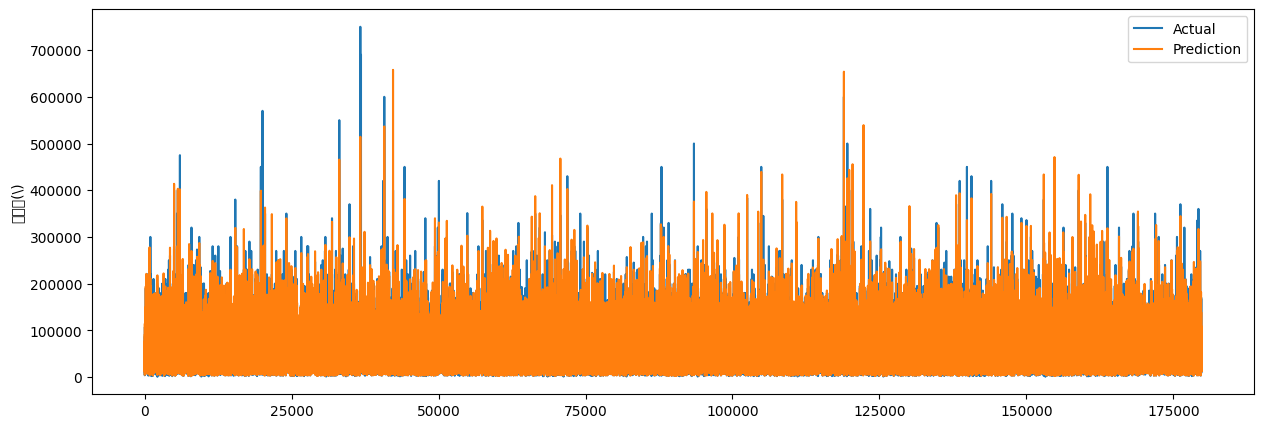

In [ ]:
# 예측 결과 시각화
y_test = y_test.reset_index(drop=True)

plt.figure(figsize=(15, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_rf_pred, label='Prediction')
plt.legend(loc='upper right')
plt.ylabel('보증금(\)')
plt.show()

In [ ]:
importances = model_rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

print("변수 중요도:")
for i, index in enumerate(sorted_indices):
    feature = X.columns[index]
    importance = round(importances[index], 4)
    print(f"{i+1}. {feature}: {importance}")

plt.figure(figsize=(12,8))


변수 중요도:
1. 법정동명te: 0.3651
2. 임대면적: 0.3278
3. 건축년도le: 0.1192
4. 접수년도le: 0.0587
5. 층: 0.0404
6. 자치구명_강남구: 0.011
7. 자치구명_서초구: 0.0036
8. 건물명_6: 0.0027
9. 건물명_4: 0.0026
10. 본번_7: 0.0025
11. 자치구명_양천구: 0.0025
12. 본번_10: 0.0025
13. 부번_0: 0.0024
14. 본번_9: 0.0024
15. 본번_6: 0.0023
16. 건물명_7: 0.0023
17. 본번_2: 0.0023
18. 본번_4: 0.0023
19. 본번_3: 0.0021
20. 건물명_12: 0.0021
21. 건물명_9: 0.0021
22. 부번_8: 0.0021
23. 자치구명_송파구: 0.002
24. 건물명_8: 0.002
25. 건물명_11: 0.0019
26. 본번_8: 0.0019
27. 본번_5: 0.0019
28. 건물명_5: 0.0019
29. 건물명_10: 0.0018
30. 부번_7: 0.0017
31. 건물명_2: 0.0017
32. 건물명_0: 0.0015
33. 건물명_1: 0.0015
34. 본번_1: 0.0014
35. 자치구명_종로구: 0.0014
36. 건물명_3: 0.0014
37. 부번_1: 0.0013
38. 본번_0: 0.0012
39. 부번_6: 0.0012
40. 자치구명_용산구: 0.0011
41. 부번_5: 0.001
42. 부번_4: 0.001
43. 자치구명_마포구: 0.0009
44. 자치구명_강동구: 0.0009
45. 부번_3: 0.0008
46. 자치구명_은평구: 0.0007
47. 자치구명_성동구: 0.0007
48. 자치구명_강서구: 0.0007
49. 자치구명_동작구: 0.0006
50. 자치구명_노원구: 0.0005
51. 자치구명_영등포구: 0.0005
52. 자치구명_광진구: 0.0003
53. 자치구명_서대문구: 0.0003
54. 자치구명_성북구: 0.000

In [ ]:
# 랜덤포레스트모델
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#+a MAE, MSE, RMSE, R-squared(수정된 R2도 고민)

model_rf = RandomForestRegressor(n_estimators=100, random_state=42, min_samples_split=10)
model_rf.fit(X_train, y_train)

y_rf_pred = model_rf.predict(X_test)

def get_score(model_name, y_true, y_pred):
    mae = round(mean_absolute_error(y_true, y_pred), 2)
    mse = round(mean_squared_error(y_true, y_pred), 2)
    rmse = round(np.sqrt(mse), 2)
    r2 = round(r2_score(y_true, y_pred), 2)
    print(model_name, 'MAE: ', mae, ', MSE: ', mse, ', RMSE: ', rmse, ', R2 Score: ', r2)

get_score('rf ', y_test, y_rf_pred)

rf  MAE:  5290.63 , MSE:  87432476.87 , RMSE:  9350.53 , R2 Score:  0.9


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


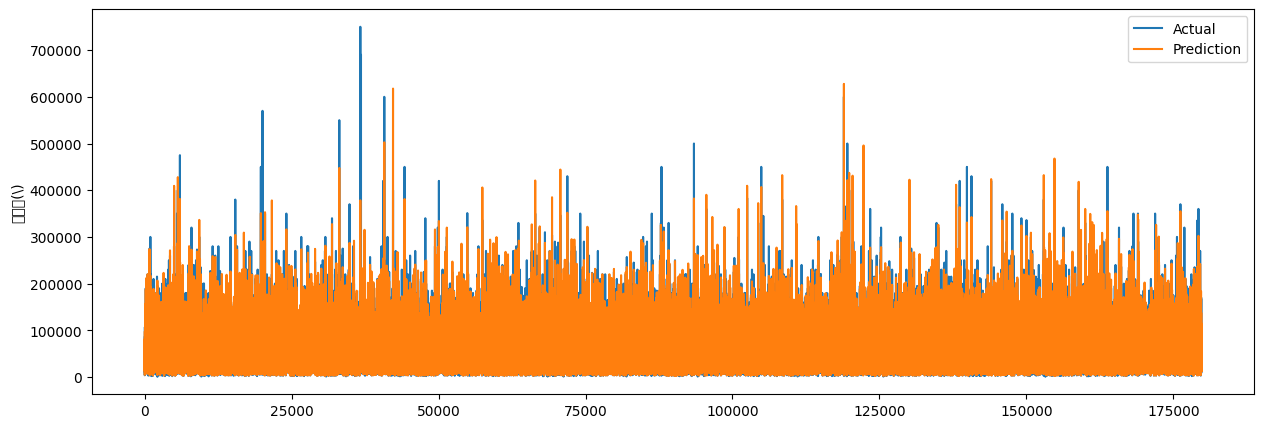

In [ ]:
# 예측 결과 시각화
y_test = y_test.reset_index(drop=True)

plt.figure(figsize=(15, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_rf_pred, label='Prediction')
plt.legend(loc='upper right')
plt.ylabel('보증금(\)')
plt.show()

In [ ]:
importances = model_rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

print("변수 중요도:")
for i, index in enumerate(sorted_indices):
    feature = X.columns[index]
    importance = round(importances[index], 4)
    print(f"{i+1}. {feature}: {importance}")

변수 중요도:
1. 법정동명te: 0.3764
2. 임대면적: 0.3344
3. 건축년도le: 0.1225
4. 접수년도le: 0.0547
5. 층: 0.0263
6. 자치구명_강남구: 0.0113
7. 자치구명_서초구: 0.0036
8. 자치구명_양천구: 0.0025
9. 건물명_6: 0.0025
10. 건물명_4: 0.0025
11. 부번_0: 0.0025
12. 본번_7: 0.0024
13. 본번_10: 0.0023
14. 건물명_7: 0.0022
15. 본번_9: 0.0022
16. 본번_6: 0.0022
17. 본번_2: 0.0021
18. 본번_4: 0.0021
19. 자치구명_송파구: 0.0021
20. 부번_8: 0.002
21. 본번_3: 0.002
22. 건물명_12: 0.0019
23. 건물명_9: 0.0019
24. 건물명_8: 0.0018
25. 건물명_5: 0.0017
26. 본번_5: 0.0017
27. 본번_8: 0.0017
28. 건물명_11: 0.0017
29. 부번_7: 0.0017
30. 건물명_10: 0.0016
31. 건물명_2: 0.0016
32. 건물명_0: 0.0015
33. 자치구명_종로구: 0.0015
34. 건물명_1: 0.0014
35. 본번_1: 0.0013
36. 부번_1: 0.0013
37. 건물명_3: 0.0013
38. 본번_0: 0.0011
39. 자치구명_용산구: 0.0011
40. 부번_6: 0.0011
41. 부번_5: 0.001
42. 부번_4: 0.0009
43. 자치구명_마포구: 0.0009
44. 자치구명_강동구: 0.0009
45. 자치구명_은평구: 0.0008
46. 부번_3: 0.0007
47. 자치구명_강서구: 0.0007
48. 자치구명_성동구: 0.0007
49. 자치구명_동작구: 0.0006
50. 자치구명_노원구: 0.0005
51. 자치구명_영등포구: 0.0005
52. 자치구명_광진구: 0.0003
53. 자치구명_서대문구: 0.0003
54. 자치구명_성북구: 0.0

<ipython-input-42-369eec765c18>:20: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  plt.tight_layout()
<ipython-input-42-369eec765c18>:20: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.tight_layout()
<ipython-input-42-369eec765c18>:20: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  plt.tight_layout()
<ipython-input-42-369eec765c18>:20: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  plt.tight_layout()
<ipython-input-42-369eec765c18>:20: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  plt.tight_layout()
<ipython-input-42-369eec765c18>:20: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from current font.
  plt.tight_layout()
<ipython-input-42-369eec765c18>:20: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  plt.tight_layout()
<ipython-input-42-369eec765c18>:20: UserWarning: G

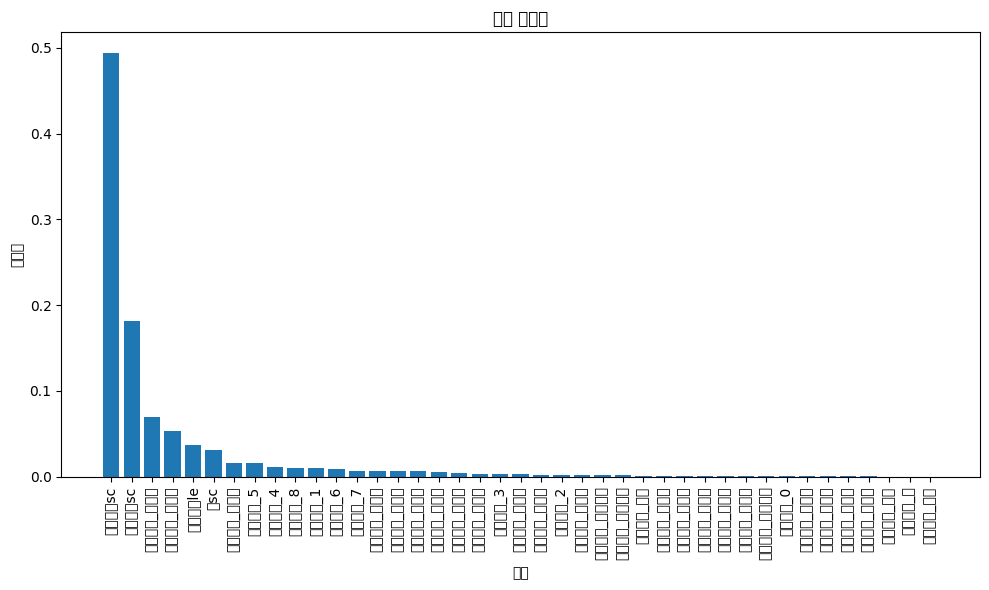

In [ ]:
importances = model_rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# 변수 중요도와 변수 이름을 저장할 리스트 생성
feature_names = []
importance_values = []

# 변수 중요도와 변수 이름 저장
for index in sorted_indices:
    feature_names.append(X.columns[index])
    importance_values.append(importances[index])

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance_values)), importance_values, align='center')
plt.xticks(range(len(importance_values)), feature_names, rotation=90)
plt.xlabel('변수')
plt.ylabel('중요도')
plt.title('변수 중요도')
plt.tight_layout()
plt.show()